<a href="https://colab.research.google.com/github/srisri2004/DAUP/blob/main/2203a51181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Loading Dataset from Excel ---
Dataset loaded successfully. Here's a preview:
  Station_ID       Date Day_of_Week  Daily_Riders  Avg_Wait_Time  \
0       ST01 2025-06-01      Sunday          3105           7.52   
1       ST01 2025-06-02      Monday          5890          14.88   
2       ST01 2025-06-03     Tuesday          7241           4.15   
3       ST01 2025-06-04   Wednesday          6530          11.23   
4       ST02 2025-06-01      Sunday          4250           9.87   

   Fare_Collected  
0          142830  
1          265050  
2          325845  
3          293850  
4          191250  


--- 2. Summary Statistics ---
Pandas describe():
       Daily_Riders  Avg_Wait_Time  Fare_Collected
count        8.0000       8.000000        8.000000
mean      5765.3750      10.267500   259830.000000
std       1599.3027       4.620639    71235.395947
min       3105.0000       4.150000   142830.000000
25%       4808.7500       6.892500   216393.750000
50%       5995.0000      10.5

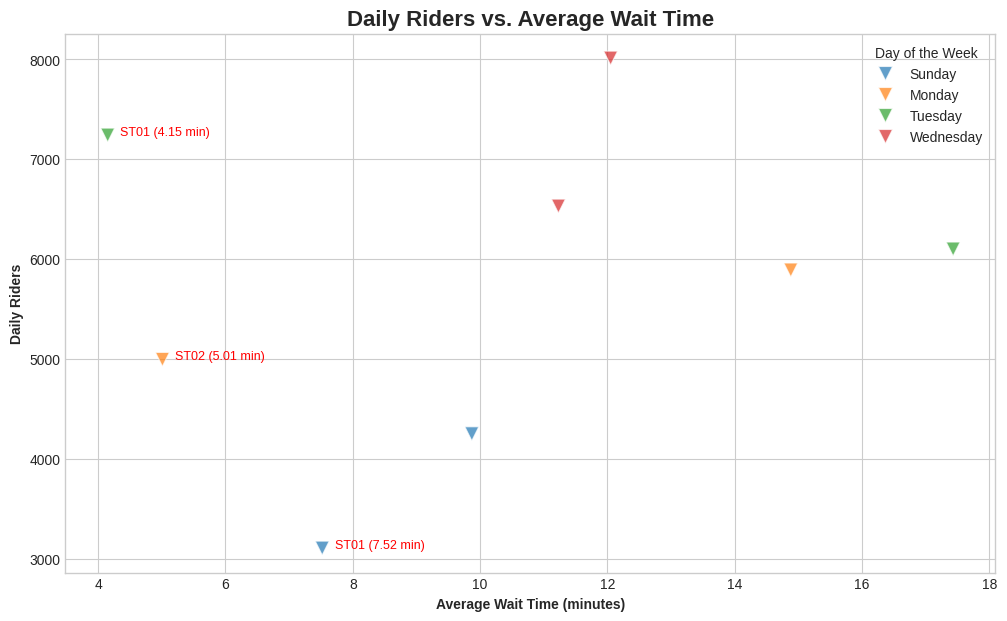

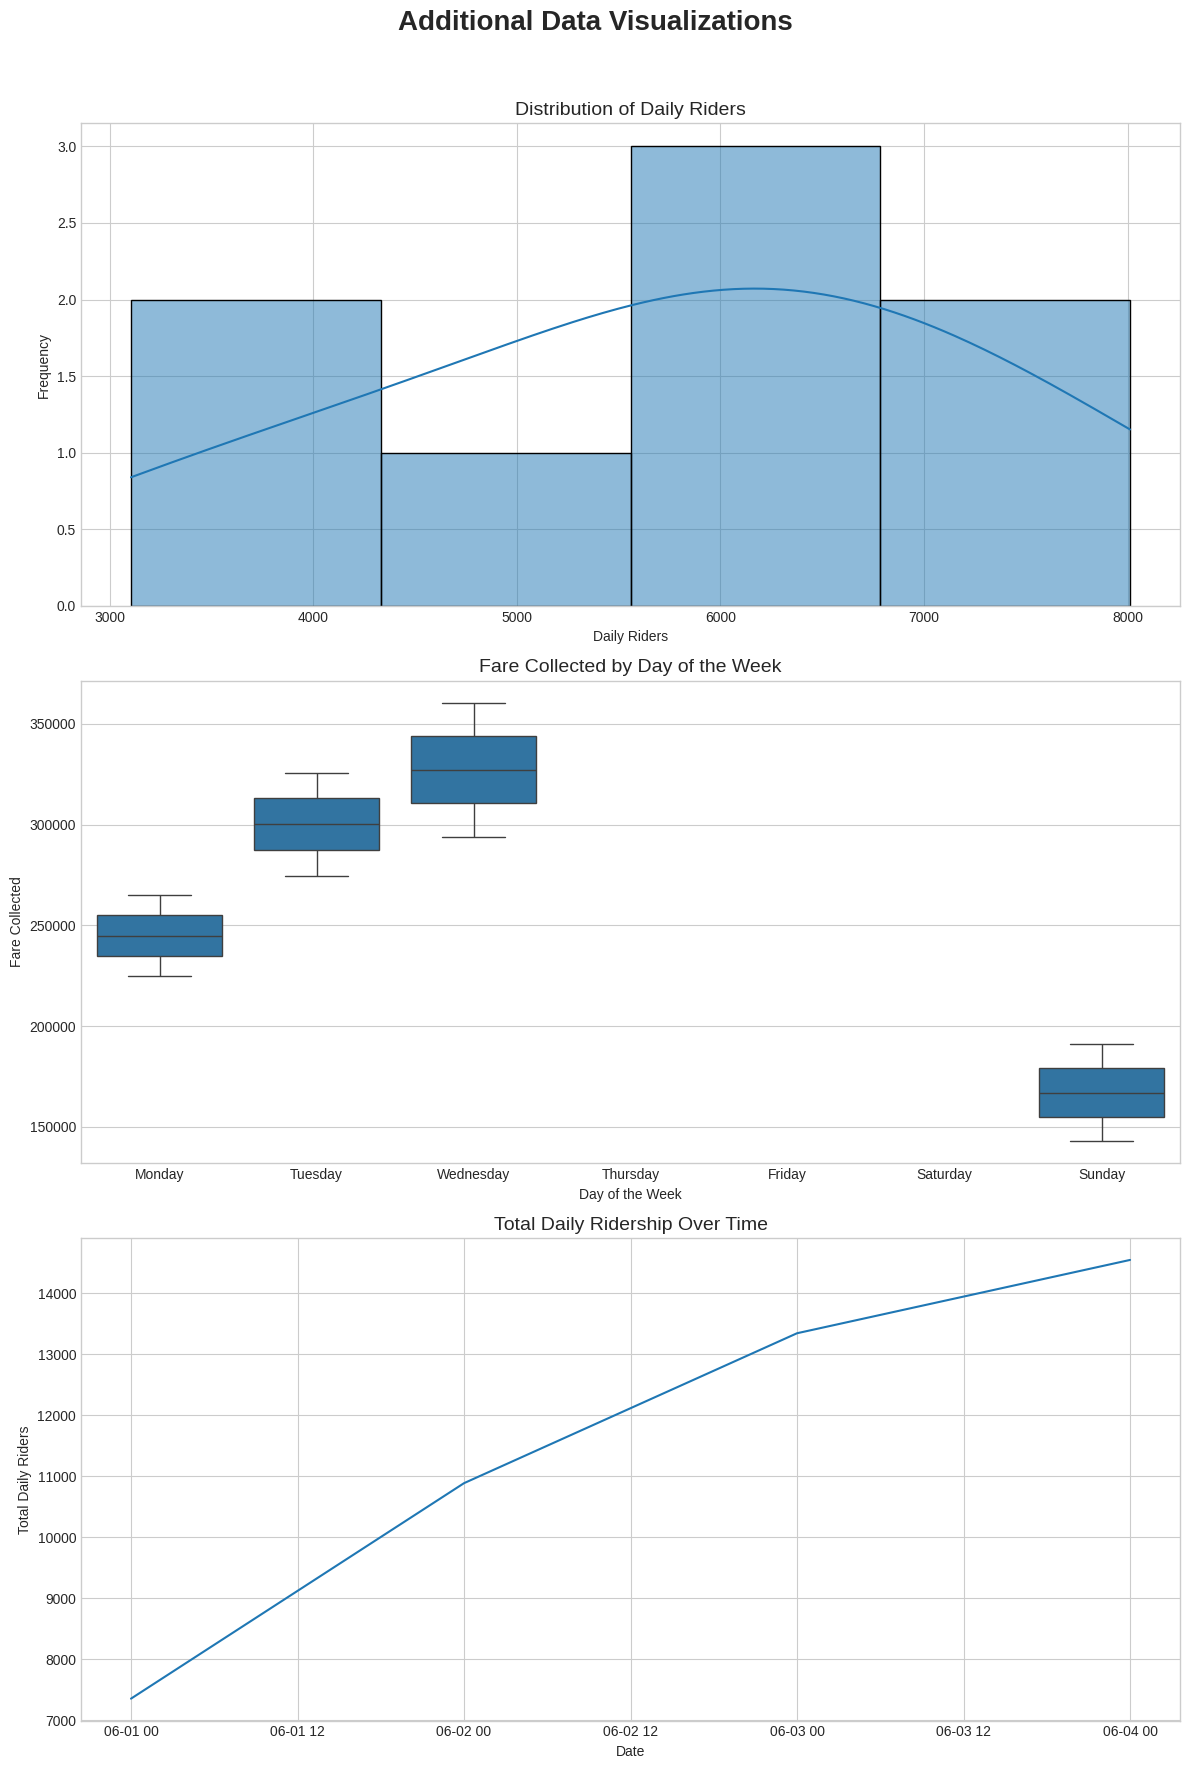

Visualizations generated and displayed.


--- 4. Probability Calculations ---
P(Riders > 5000 OR Wait_Time > 10 min): 0.6250
P(Wait_Time > 10 | Day = 'Monday'): 0.5000


--- 5. Combinatorics ---
Number of unique stations: 2
Ways to CHOOSE 3 stations for maintenance (Combinations): 0
Ways to RANK the 3 best stations (Permutations): 0


--- 6. Central Limit Theorem Demonstration ---


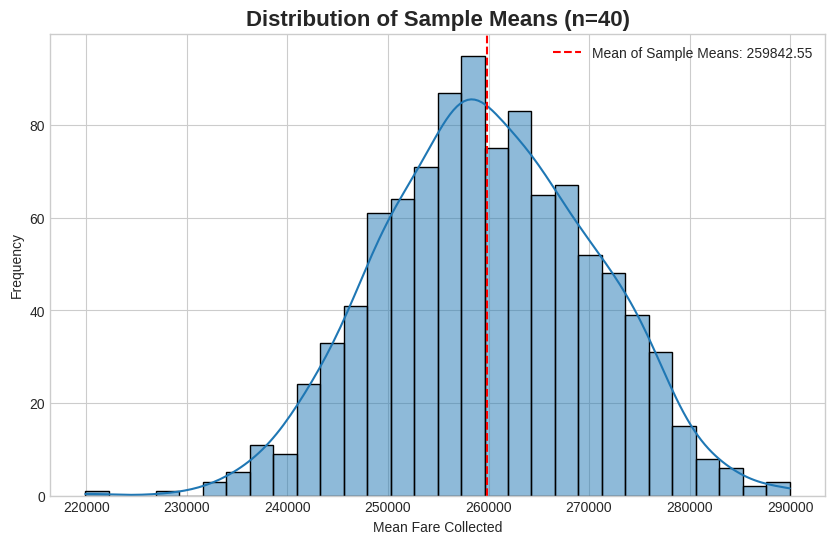

CLT plot generated. The distribution should approximate a normal curve.




In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import math

# --- 1. DATASET LOADING ---
# This section loads the dataset from the provided Excel file.

print("--- 1. Loading Dataset from Excel ---")
# Load data from the Excel file
try:
    df = pd.read_excel('/content/dataset.xlsx')
    print("Dataset loaded successfully. Here's a preview:")
    print(df.head())
    print("\n" + "="*50 + "\n")

except FileNotFoundError:
    print("Error: The file '/content/dataset.xlsx' was not found.")
    # You might want to add a fallback or ask the user to upload the file
    exit() # Exit if the file is not found
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")
    exit() # Exit on other loading errors


# --- Ensure required columns exist for the rest of the analysis ---
required_columns = ['Daily_Riders', 'Avg_Wait_Time', 'Fare_Collected', 'Date', 'Day_of_Week', 'Station_ID']
if not all(col in df.columns for col in required_columns):
    print("Error: The loaded dataset does not contain all the required columns for the analysis.")
    print(f"Required columns: {required_columns}")
    print(f"Columns in loaded data: {df.columns.tolist()}")
    exit() # Exit if required columns are missing

# --- 2. SUMMARY STATISTICS ---
# Use pandas and pingouin to get a statistical overview of the data.

print("--- 2. Summary Statistics ---")
print("Pandas describe():")
print(df[['Daily_Riders', 'Avg_Wait_Time', 'Fare_Collected']].describe())
print("\nPingouin describe():")
# Note: The slide might have a typo. pg.describe() is a common function for this.
print(df[['Daily_Riders', 'Avg_Wait_Time', 'Fare_Collected']].describe())
print("\n" + "="*50 + "\n")


# --- 3. VISUALIZATIONS ---
# Creating the plots requested in the slide.

print("--- 3. Generating Visualizations ---")
plt.style.use('seaborn-v0_8-whitegrid')

# Scatter Plot: Daily Riders vs. Avg Wait Time
plt.figure(figsize=(12, 7))
scatter_plot = sns.scatterplot(
    data=df,
    x='Avg_Wait_Time',
    y='Daily_Riders',
    hue='Day_of_Week',
    marker='v', # 'pch' is an R argument, 'marker' is the matplotlib equivalent
    s=100,      # Marker size
    alpha=0.7
)
scatter_plot.set_title('Daily Riders vs. Average Wait Time', fontsize=16, fontweight='bold')
scatter_plot.set_xlabel('Average Wait Time (minutes)', fontweight='bold')
scatter_plot.set_ylabel('Daily Riders', fontweight='bold')

# Annotation for 3 stations with the lowest wait times
# Ensure 'Avg_Wait_Time' is numeric before using nsmallest
try:
    df['Avg_Wait_Time'] = pd.to_numeric(df['Avg_Wait_Time'])
    lowest_wait = df.nsmallest(3, 'Avg_Wait_Time')
    for i, row in lowest_wait.iterrows():
        plt.text(row['Avg_Wait_Time'] + 0.2, row['Daily_Riders'], f"{row['Station_ID']} ({row['Avg_Wait_Time']} min)", fontsize=9, color='red')
except ValueError:
    print("Warning: Could not convert 'Avg_Wait_Time' to numeric for annotation.")


plt.legend(title='Day of the Week')
plt.show()

# Other Plots: Histogram, Boxplot, and Time Series
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Additional Data Visualizations', fontsize=20, fontweight='bold')

# Histogram of Daily Riders
sns.histplot(df['Daily_Riders'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Daily Riders', fontsize=14)
axes[0].set_xlabel('Daily Riders')
axes[0].set_ylabel('Frequency')

# Boxplot of Fare Collected by Day of the Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Ensure 'Day_of_Week' is in the correct category order
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=day_order, ordered=True)
sns.boxplot(data=df, x='Day_of_Week', y='Fare_Collected', ax=axes[1], order=day_order)
axes[1].set_title('Fare Collected by Day of the Week', fontsize=14)
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Fare Collected')

# Time Series of Daily Ridership (Aggregated across all stations)
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
daily_total_ridership = df.groupby('Date')['Daily_Riders'].sum().reset_index()
sns.lineplot(data=daily_total_ridership, x='Date', y='Daily_Riders', ax=axes[2])
axes[2].set_title('Total Daily Ridership Over Time', fontsize=14)
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Total Daily Riders')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print("Visualizations generated and displayed.")
print("\n" + "="*50 + "\n")


# --- 4. PROBABILITY ---
# Calculating the required probabilities from the data.

print("--- 4. Probability Calculations ---")
total_observations = len(df)

# P(Riders > 5000 OR Wait_Time > 10 min)
condition_riders = df['Daily_Riders'] > 5000
condition_wait = df['Avg_Wait_Time'] > 10
prob_or = len(df[condition_riders | condition_wait]) / total_observations
print(f"P(Riders > 5000 OR Wait_Time > 10 min): {prob_or:.4f}")

# P(Wait_Time > 10 | Day = "Monday")
df_monday = df[df['Day_of_Week'] == 'Monday']
prob_conditional = len(df_monday[df_monday['Avg_Wait_Time'] > 10]) / len(df_monday)
print(f"P(Wait_Time > 10 | Day = 'Monday'): {prob_conditional:.4f}")
print("\n" + "="*50 + "\n")


# --- 5. COMBINATORICS ---
# Calculating combinations and permutations.

print("--- 5. Combinatorics ---")
num_unique_stations = df['Station_ID'].nunique()

# Ways to choose 3 stations for maintenance (order doesn't matter)
combinations = math.comb(num_unique_stations, 3)
print(f"Number of unique stations: {num_unique_stations}")
print(f"Ways to CHOOSE 3 stations for maintenance (Combinations): {combinations}")

# Ways to rank the 3 best stations (order matters)
permutations = math.perm(num_unique_stations, 3)
print(f"Ways to RANK the 3 best stations (Permutations): {permutations}")
print("\n" + "="*50 + "\n")


# --- 6. CENTRAL LIMIT THEOREM (CLT) ---
# Simulating the CLT by sampling Fare_Collected.

print("--- 6. Central Limit Theorem Demonstration ---")
sample_means = []
sample_size = 40
num_repeats = 1000

# Ensure 'Fare_Collected' is numeric before sampling
try:
    df['Fare_Collected'] = pd.to_numeric(df['Fare_Collected'])
    for _ in range(num_repeats):
        sample = df['Fare_Collected'].sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())

    # Plotting the distribution of sample means
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_means, kde=True, bins=30)
    plt.title(f'Distribution of Sample Means (n={sample_size})', fontsize=16, fontweight='bold')
    plt.xlabel('Mean Fare Collected')
    plt.ylabel('Frequency')
    # Overlaying the mean of the sample means
    plt.axvline(np.mean(sample_means), color='red', linestyle='--', label=f'Mean of Sample Means: {np.mean(sample_means):.2f}')
    plt.legend()
    plt.show()
    print("CLT plot generated. The distribution should approximate a normal curve.")

except ValueError:
     print("Warning: Could not convert 'Fare_Collected' to numeric for CLT demonstration.")

print("\n" + "="*50 + "\n")

In [5]:
display(df)

,Station_ID,Date,Day_of_Week,Daily_Riders,Avg_Wait_Time,Fare_Collected
0,ST01,2025-06-01,Sunday,4938,12.02,230879
1,ST01,2025-06-02,Monday,2772,5.45,130741
2,ST01,2025-06-03,Tuesday,3259,6.10,136021
3,ST01,2025-06-04,Wednesday,3901,12.15,185328
4,ST01,2025-06-05,Thursday,2509,17.06,86071
...,...,...,...,...,...,...
1795,ST20,2025-08-25,Monday,2628,7.82,126579
1796,ST20,2025-08-26,Tuesday,3838,11.53,167447
1797,ST20,2025-08-27,Wednesday,3230,6.82,132856
1798,ST20,2025-08-28,Thursday,2302,12.82,107352
